In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("TV.csv")
df.shape

(666, 11)

In [3]:
df.head(2)

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,channel,Operating_system,Picture_quality,Speaker,Frequency
0,Croma,4.2,1773,217,7990,20000,HD Ready 1366 x 768 Pixels,20 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,1 Year Warranty
1,Adsun,3.8,6742,930,8699,21999,Netflix|Disney+Hotstar|Youtube,Operating System: Android Based,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate


### Q1.

In [28]:
df_q1 = df[["Frequency", "Picture_quality", "Speaker"]].copy()
df_q1.head(2)

,Frequency,Picture_quality,Speaker
0,1 Year Warranty,60 Hz Refresh Rate,2 x HDMI | 2 x USB
1,60 Hz Refresh Rate,HD Ready 1366 x 768 Pixels,20 W Speaker Output


In [29]:
# "[0-9]{2,3} Hz"

In [30]:
ser_u = pd.Series(df_q1["Speaker"].unique())
# ser_u = pd.Series(df_q1["Picture_quality"].unique())
# ser_u = pd.Series(df_q1["Frequency"].unique())
# ser_u[ser_u.str.contains("Hz")]
ser_u[ser_u.str.contains("[0-9]{2,3} Hz")]

19     60 Hz Refresh Rate
31     50 Hz Refresh Rate
41    200 Hz Refresh Rate
46    120 Hz Refresh Rate
47    100 Hz Refresh Rate
dtype: object

In [31]:
ser_u[ser_u.str.contains("[^0-9]60 Hz|^60 Hz")]

19    60 Hz Refresh Rate
dtype: object

In [32]:
x = df_q1.loc[0, :"Speaker"]
x

Frequency             1 Year Warranty
Picture_quality    60 Hz Refresh Rate
Speaker            2 x HDMI | 2 x USB
Name: 0, dtype: object

In [33]:
x.str.contains("Hz").sum()

1

In [34]:
tx_reg = "[0-9]{2,3} Hz"
ser_hz_cnt = df_q1.loc[:, :"Speaker"].apply(lambda x: x.str.contains(tx_reg).sum(), 
                                            axis = 1)
ser_hz_cnt.head(2)

0    1
1    1
dtype: int64

In [35]:
ser_hz_cnt.value_counts()

1    662
0      4
Name: count, dtype: int64

In [36]:
df_q1.loc[ser_hz_cnt == 0, ]

,Frequency,Picture_quality,Speaker
234,3 x HDMI | 2 x USB,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output
237,3 x HDMI | 2 x USB,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output
335,1 Year Manufaturer Warranty,40 W Speaker Output,4 x HDMI | 3 x USB
547,3 x HDMI | 2 x USB,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output


In [37]:
df_q1 = df_q1.loc[ser_hz_cnt != 0, ].reset_index(drop = True)

In [38]:
df_q1["Hz_1"] = df_q1["Frequency"      ].str.contains("60 Hz") + 0
df_q1["Hz_2"] = df_q1["Picture_quality"].str.contains("60 Hz") + 0
df_q1["Hz_3"] = df_q1["Speaker"        ].str.contains("60 Hz") + 0

In [39]:
df_q1["Hz_cnt"] = df_q1["Hz_1"] + df_q1["Hz_2"] + df_q1["Hz_3"]

In [40]:
df_q1.head(2)

,Frequency,Picture_quality,Speaker,Hz_1,Hz_2,Hz_3,Hz_cnt
0,1 Year Warranty,60 Hz Refresh Rate,2 x HDMI | 2 x USB,0,1,0,1
1,60 Hz Refresh Rate,HD Ready 1366 x 768 Pixels,20 W Speaker Output,1,0,0,1


In [41]:
df_q1["Hz_cnt"].value_counts()

Hz_cnt
1    510
0    152
Name: count, dtype: int64

In [42]:
df_q1.loc[:, :"Speaker"].apply(lambda x: x.str.contains("60 Hz").sum(), 
                               axis = 1).value_counts()

1    510
0    152
Name: count, dtype: int64

### Q2.

In [51]:
df_q2 = df[["Stars", "Operating_system", "channel", "Picture_quality"]].copy()
df_q2.head(2)

,Stars,Operating_system,channel,Picture_quality
0,4.2,20 Speaker Output,HD Ready 1366 x 768 Pixels,60 Hz Refresh Rate
1,3.8,Operating System: Android Based,Netflix|Disney+Hotstar|Youtube,HD Ready 1366 x 768 Pixels


In [47]:
# ser_u = pd.Series(df_q2["Operating_system"].unique())
# ser_u = pd.Series(df_q2["channel"].unique())
ser_u = pd.Series(df_q2["Picture_quality"].unique())
ser_u[ser_u.str.contains("4K|8K")]

2                      Ultra HD (4K) 3840 x 2160 Pixels
4     Ultra HD (4K) Crystal 4K FE UHD (3840 x 2160) ...
7                        Ultra HD (4K) 3840×2160 Pixels
9                      Ultra HD (4K) 3860 x 2160 Pixels
10                       Ultra HD (4K) 3840X2160 Pixels
12                     Ultra HD (4K) 3840 × 2160 Pixels
13                       Ultra HD (4K) 3840*2160 Pixels
14                       Ultra HD (4K) 3840x2160 Pixels
28                     Ultra HD (8K) 7680 x 4320 Pixels
34                     Ultra HD (4K) 3840 � 2160 Pixels
dtype: object

In [52]:
ser_4k = df_q2.iloc[:, 1:].apply(lambda x: x.str.contains("4K").sum(), axis = 1)
ser_4k.value_counts()

1    365
0    301
Name: count, dtype: int64

In [53]:
ser_8k = df_q2.iloc[:, 1:].apply(lambda x: x.str.contains("8K").sum(), axis = 1)
ser_8k.value_counts()

0    665
1      1
Name: count, dtype: int64

In [54]:
stat_4k = df_q2.loc[ser_4k == 1, "Stars"].mean()
stat_8k = df_q2.loc[ser_8k == 1, "Stars"].mean()

In [55]:
round(abs(stat_4k - stat_8k), 2)

0.38

### Q3.

In [59]:
df["channel"].unique()

array(['HD Ready 1366 x 768 Pixels', 'Netflix|Disney+Hotstar|Youtube',
       'Netflix|Prime Video|Disney+Hotstar|Youtube',
       'HD Ready 1366 X 768 Pixels', 'Netflix|Prime Video|Youtube',
       'Youtube', 'Prime Video|Disney+Hotstar|Youtube',
       'Prime Video|Youtube', 'Netflix|Youtube',
       'HD Ready 1366 x 786 Pixels', 'Disney+Hotstar|Youtube',
       'HD Ready 1366*768 Pixels', 'Ultra HD (4K) 3840 x 2160 Pixels',
       'Netflix|Prime Video|Apple TV|Disney+Hotstar|Youtube',
       'HD Ready 720p Pixels', 'Ultra HD (4K) ?3840 x 2160 Pixels',
       'Operating System: Linux', 'Full HD 1920 x 1080 Pixels',
       'Operating System: Android', 'Ultra HD (4K) 3840*2160 Pixels',
       'Operating System: WebOS', 'Operating System: Tizen',
       'Ultra HD (4K) 3840 x 2160 - Ultra HD Pixels',
       'Ultra HD (4K) 4K QLED (3840 x 2160) Pixels', 'Prime Video',
       'Ultra HD (4K) 3840 * 2160 Pixels', 'HD Ready 1366X768P Pixels',
       'Full HD 1980 x 1080 Pixels', 'Operating Sy

In [62]:
df_q3 = df.loc[df["channel"].str.contains("Pixel|Oper"), ].copy()
df_q3["channel"].unique()

In [63]:
# ~ 은 True와 False 반전
df_q3 = df.loc[~df["channel"].str.contains("Pixel|Oper"), ].copy()
len(df_q3)

548

In [66]:
df_q3["x1"] = df_q3["Reviews"] / df_q3["Ratings"]
df_q3["x2"] = df_q3["MRP"]
df_q3["x3"] = df_q3["current_price"] / df_q3["MRP"]
df_q3["x4"] = df_q3["channel"].str.contains("Netflix") + 0
df_q3["x5"] = df_q3["channel"].str.contains("Prime Video") + 0
df_q3["x6"] = df_q3["Picture_quality"].str.contains("4K|8K") + 0

In [67]:
df_q3.head(2)

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,channel,Operating_system,Picture_quality,Speaker,Frequency,x1,x2,x3,x4,x5,x6
1,Adsun,3.8,6742,930,8699,21999,Netflix|Disney+Hotstar|Youtube,Operating System: Android Based,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,0.137941,21999,0.395427,1,0,0
2,LG,4.4,38870,3443,16499,21990,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: WebOS,HD Ready 1366 x 768 Pixels,10 W Speaker Output,50 Hz Refresh Rate,0.088577,21990,0.750296,1,1,0


In [68]:
df_model = df_q3[["Stars", "x1", "x2", "x3", "x4", "x5", "x6"]]
df_model.head(2)

,Stars,x1,x2,x3,x4,x5,x6
1,3.8,0.137941,21999,0.395427,1,0,0
2,4.4,0.088577,21990,0.750296,1,1,0


In [69]:
len(df_model)

548

In [70]:
df_model.isna().sum()

Stars      0
x1       351
x2         0
x3         0
x4         0
x5         0
x6         0
dtype: int64

In [71]:
df_model = df_model.dropna()
len(df_model)

197

In [ ]:
model_rf = RandomForestRegressor(random_state = 123)
model_rf.fit(X = df_model.drop(columns = "Stars"),
             y = df_model["Stars"])

In [ ]:
model_rf.feature_importances_

In [80]:
pd.DataFrame([model_rf.feature_importances_],
             columns = df_model.columns[1:])

,x1,x2,x3,x4,x5,x6
0,0.312206,0.17384,0.444691,0.027141,0.024004,0.018118


In [ ]:
pd.DataFrame([model_rf.feature_importances_],
             columns = model_rf.feature_names_in_)

In [78]:
pd.Series(model_rf.feature_importances_,
          index = model_rf.feature_names_in_).reset_index()

,index,0
0,x1,0.312206
1,x2,0.173840
2,x3,0.444691
3,x4,0.027141
4,x5,0.024004
5,x6,0.018118


<AxesSubplot:>

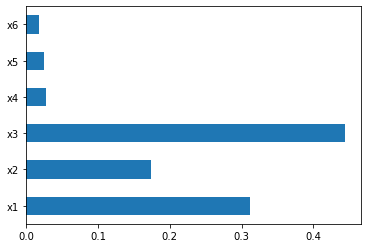

In [79]:
pd.Series(model_rf.feature_importances_,
          index = model_rf.feature_names_in_).plot.barh()